In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [22]:
# name of file w/ topic counts
count_file = "allpapers-topics-pca.csv"

In [23]:
# load csv into pandas dataframe

df = pd.read_csv(count_file)
    
# csv has header row in format "Title" then each topic number 0-99
# each subesequent row is in format newspaper title, t00-proportion, t02-proportion etc.
# each row totals the number of articles in corpus of that paper
# each column totals the proportion of that topic in corpus   

In [24]:
df_by_title = df.set_index('Title')
df_by_title.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Title,,,,,,,,,,,,,,,,,,,,,
DouglassMonthly,13.222892,12.046089,10.486815,9.517640,14.400103,22.346143,12.756646,9.497160,10.704789,38.846152,...,21.383964,12.272897,103.861046,37.842687,17.954669,22.370634,15.990274,8.744114,12.890965,10.699458
FrankLesliesWeekly,430.993076,315.826173,441.441991,956.591844,414.888241,432.361287,1278.900992,318.591875,281.146261,183.365775,...,308.021346,227.255325,139.816511,1310.080230,414.228875,261.644554,504.082428,258.668324,720.755608,702.031975
FrederickDouglassPaper,100.125868,92.792877,87.026995,69.643911,97.840476,185.471040,64.854340,90.074311,63.951905,196.107276,...,172.932916,100.712126,44.521633,78.535538,109.875574,124.062985,126.101739,59.951604,111.180548,87.238270
FreedomsJournal,28.597598,24.864513,21.309666,13.039892,19.830672,31.020446,12.155596,19.611847,14.908849,33.302635,...,16.340896,19.481188,7.799965,16.771049,22.070077,12.601676,17.870350,11.868706,26.821684,21.144665
GodeysLadysBook,418.465379,306.833079,446.928766,235.292696,280.911942,224.599982,276.468548,406.207176,238.038800,158.052908,...,199.775814,271.396646,189.186225,205.839478,323.567739,170.050932,331.528962,1752.317534,772.447621,501.615699


In [32]:
features = list(df_by_title.columns.values)

scaled_data = df_by_title.loc[:,features].values

scaled_data = StandardScaler().fit_transform(scaled_data)


In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(scaled_data)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['Title']]], axis = 1)

In [38]:
finalDf.head()

,principal component 1,principal component 2,Title
0,-5.932502,0.454301,DouglassMonthly
1,7.242038,-5.532717,FrankLesliesWeekly
2,-3.411115,0.639709,FrederickDouglassPaper
3,-5.806511,0.273086,FreedomsJournal
4,4.160006,-4.598837,GodeysLadysBook


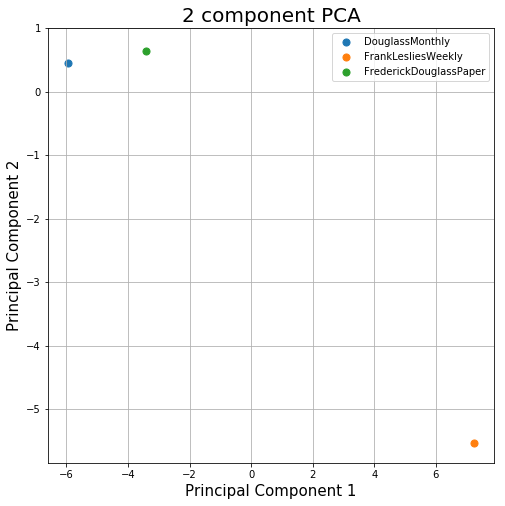

In [49]:
# LK to here figure out how to plot all papers 
# need to modify targets line and whatever else is limiting display to 3

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['DouglassMonthly', 'FrankLesliesWeekly','FrederickDouglassPaper','FreedomsJournal','GodeysLadysBook']
#targets = finalDf['Title']
# colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Title'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
            #   , c = color
               , s = 50)
ax.legend(targets)
ax.grid()